<a href="https://colab.research.google.com/github/Olesya-Gerasimova/GoogleApps_DataAnalysis/blob/main/GoogleApps_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+4" color=black ><b> <center>About Dataset</center></b></font>


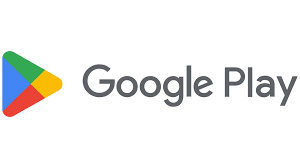



#**Context**
>В то время как многие общедоступные наборы данных (на Kaggle и т.п.) предоставляют данные Apple App Store, для приложений Google Play Store доступно не так много аналогичных наборов данных в Интернете. Копнув глубже, я обнаружила, что на странице iTunes App Store развернута хорошо проиндексированная структура, похожая на приложение, позволяющая легко и просто просматривать веб-страницы. С другой стороны, Google Play Store использует сложные современные методы (например, динамическую загрузку страниц) с использованием JQuery, что усложняет парсинг.

#**Content**
>Каждое приложение (строка) имеет значения категории, рейтинга, размера и т. д.

#**Acknowledgements**
>Эта информация взята из магазина Google Play. Эта информация о приложении не была бы доступна без него.

#**Inspiration**
>Данные о приложениях в Play Store обладают огромным потенциалом для успеха компаний, занимающихся разработкой приложений. Разработчики могут получить полезную информацию для работы и завоевания рынка Android!

#**Columns**

>* **App** - Application name
* **Category** - Category the app belongs to
* **Rating** - Overall user rating of the app (as when scraped)
* **Reviews** - Number of user reviews for the app (as when scraped)
* **Size** - Size of the app (as when scraped)
* **Installs** - Number of user downloads/installs for the app (as when scraped)
* **Type** - Paid or Free
* **Price** - Price of the app (as when scraped)
* **Content Rating** - Age group the app is targeted at - Children / Mature 21+ / Adult
* **Genres** - An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to






























Естественно, мы начинаем с импорта общих библиотек!


In [1]:
from IPython.display import Image
Image(url='https://media.tenor.com/NZqiUoAnAFsAAAAC/cat-computer.gif')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/googleplaystore.csv')


Проверяя информацию, есть не нулевые значения, которые необходимо решить. Поскольку моей основной целью является прогнозирование рейтингов приложений, я удалила все значения NaN.



In [5]:
print(df.shape)

(10841, 13)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB




---



##Rating

In [9]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

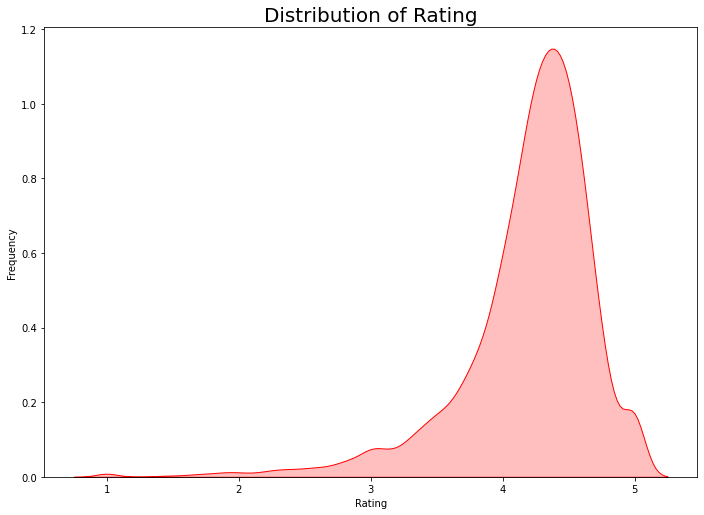

In [10]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

**Finding**

Средний рейтинг приложения в магазине составляет около 4, что очень высоко.

##Category

In [11]:
print( len(df['Category'].unique()) , "categories")

print("\n", df['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

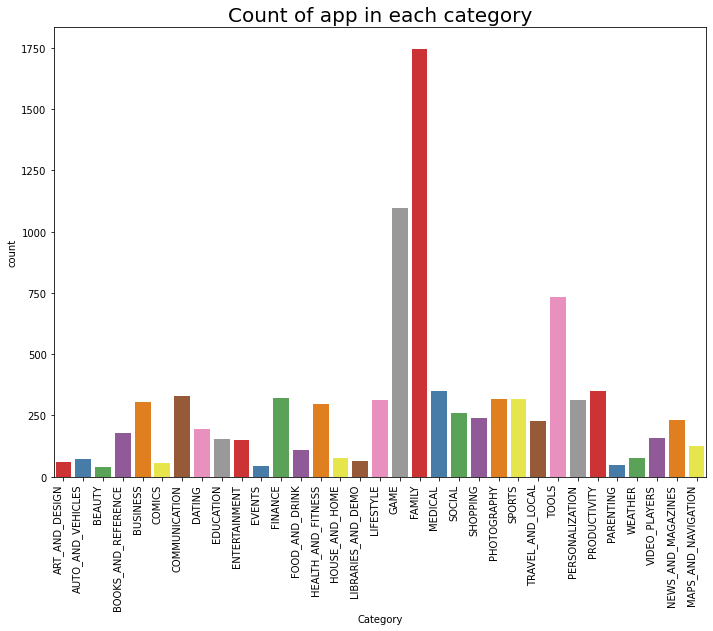

In [12]:
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

**Finding**

Категория «Игра» и «Семья» — самые популярные приложения в магазине.

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

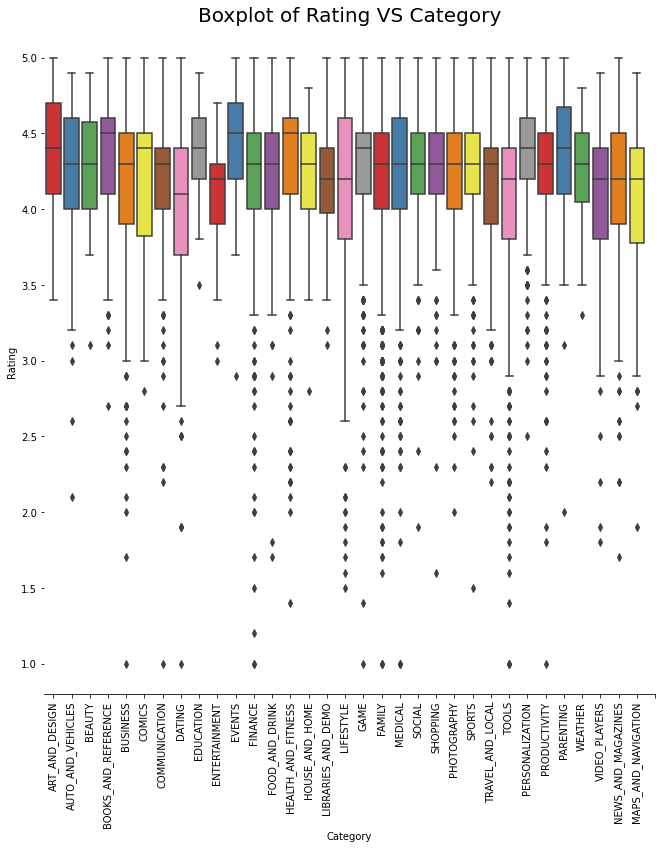

In [13]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

**Finding**

Рейтинг приложений в каждой категории не слишком отличается

##Reviews

In [14]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

**Finding**

Данные все еще в объектном типе, нам нужно преобразовать в int

Text(0.5, 1.0, 'Distribution of Reveiw')

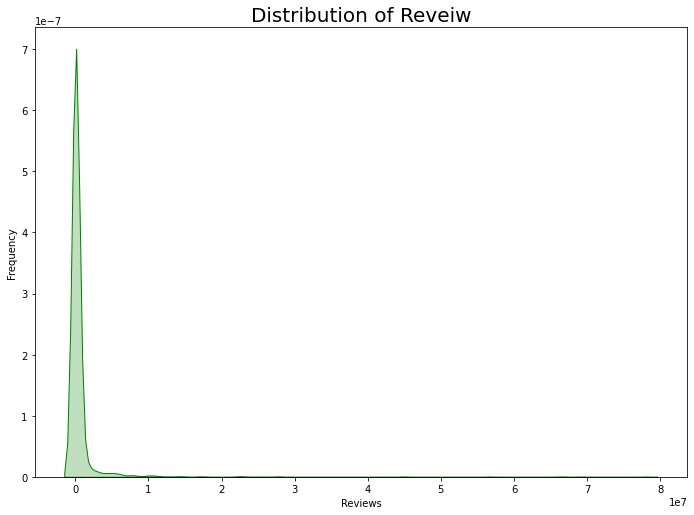

In [15]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

In [16]:
df[df.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


**Finding**

Большинство приложений в этом магазине имеют менее 1 млн отзывов.
Очевидно, что известные приложения имеют много отзывов.

<Figure size 720x720 with 0 Axes>

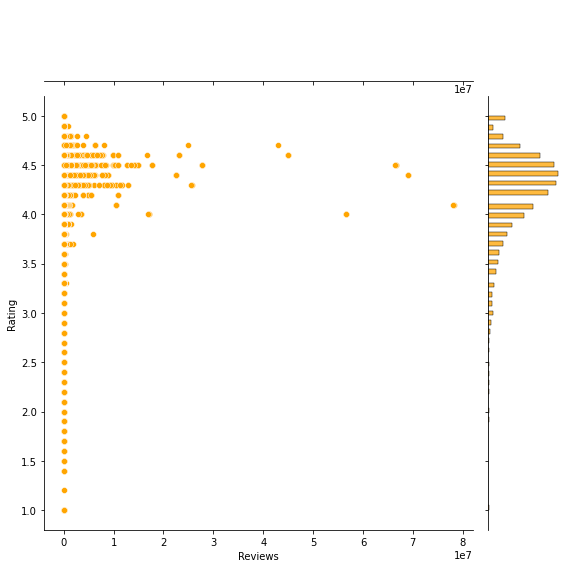

In [17]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=df,size = 8);

Text(0.5, 1.0, 'Rating VS Reveiws')

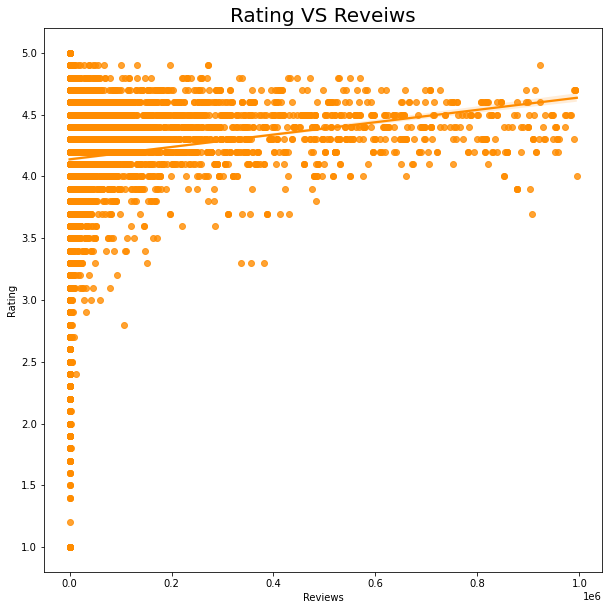

In [18]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

**Finding**

Похоже, известное приложение получит хороший рейтинг

##Size

In [19]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [20]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

**Finding**

Данные все еще в типе объекта и содержат метрический символ для перефикса,
и специальный размер, который «зависит от устройства», который нам нужен для работы с ним.

In [21]:
len(df[df.Size == 'Varies with device'])

1637

In [22]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [23]:
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

**Note**

Я решил заполнить «В зависимости от устройства» средним размером в каждой категории.

<Figure size 720x720 with 0 Axes>

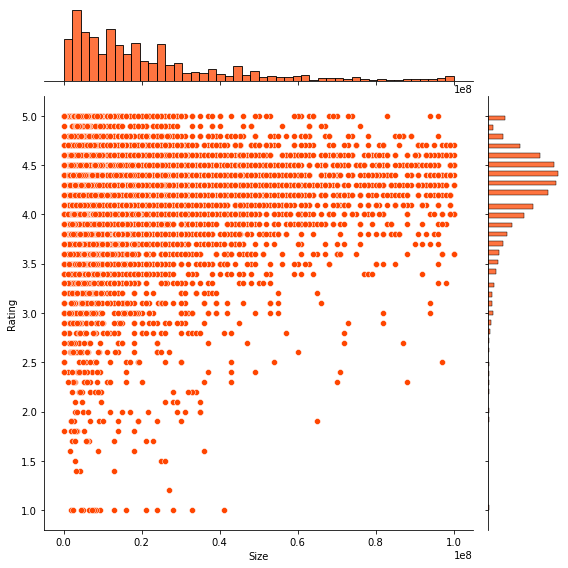

In [24]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=df, size = 8);

##Installs

In [25]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

**Finding**

Данные все еще в объектном типе и содержат знак плюс

In [26]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

**Note**

Я кодирую его по порядку размера;
пример: 

    0 относится к 1+

    1 относится к 5+

    2 относятся к 10+

In [27]:
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))

In [28]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [29]:
Sorted_value = sorted(list(df['Installs'].unique()))
df['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )
df['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

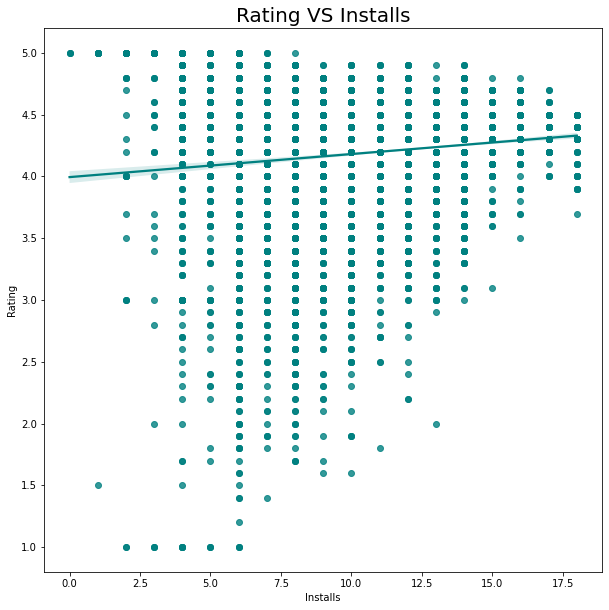

In [30]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=df);
plt.title('Rating VS Installs',size = 20)

**Finding**

Похоже, количество установок влияет на рейтинг

## Type

In [31]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

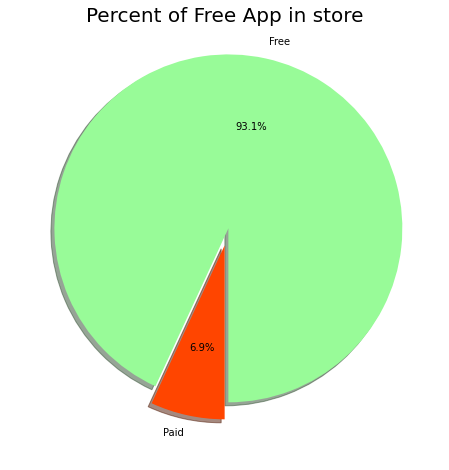

In [32]:
# Data to plot
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

**Finding**

Большинство приложений в этом магазине бесплатны (93,1%).

**Note**

Поскольку строка не может войти в модель, мне нужно немного изменить формат

In [33]:
df['Free'] = df['Type'].map(lambda s :1  if s =='Free' else 0)
df.drop(['Type'], axis=1, inplace=True)

##Price

In [34]:

df['Price'].head()



0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [35]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

**Finding**

Данные в объектном типе, в формате знака доллара.

In [36]:
df['Price'].value_counts().head(30)

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$24.99        5
$11.99        5
$12.99        5
$19.99        5
$8.99         4
$5.49         3
$16.99        3
$10.00        3
$3.95         2
$1.00         2
$1.70         2
$17.99        2
$33.99        2
Name: Price, dtype: int64

In [37]:
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

**Finding**

Средняя цена составляет около 0,96, но большинство из них бесплатны (8715 из 9360).
Самое дорогое приложение 400 долларов!!!.

In [38]:
df[df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'Scatter plot Rating VS Price')

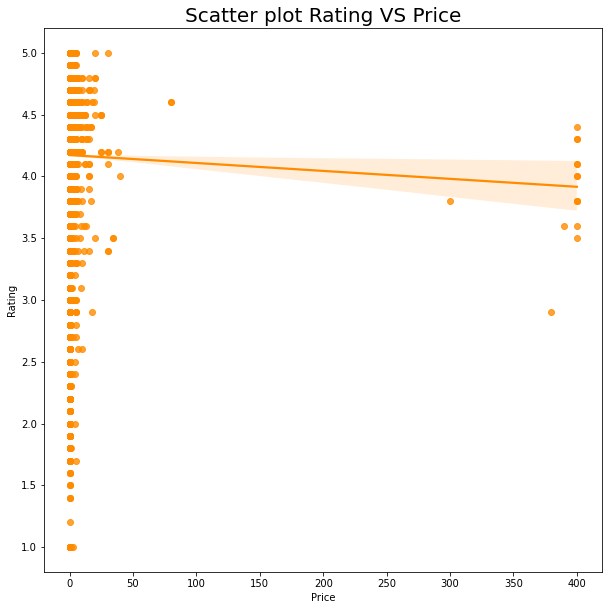

In [39]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

**Finding**

Заявка на более высокую цену может разочаровать клиента, если она недостаточно хороша.

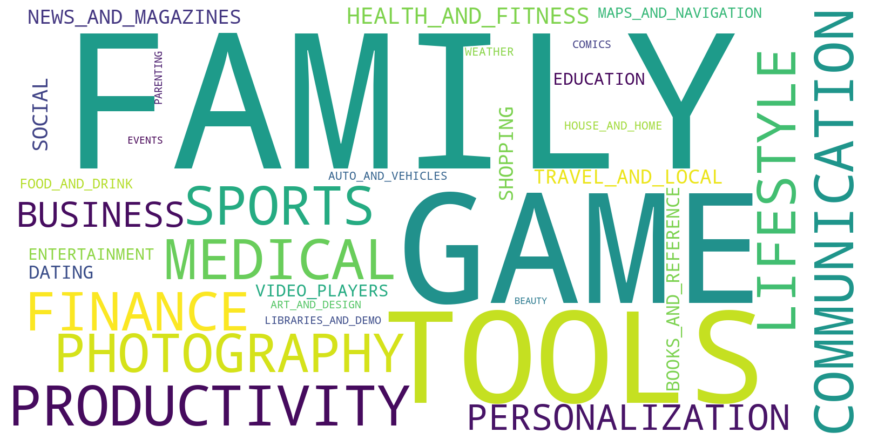

In [40]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(max_font_size=350, collocations=False, max_words=33, width=1600, height=800, background_color="white").generate(' '.join(df['Category']))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



---



In [41]:
df = pd.read_csv('/content/drive/MyDrive/DataAnalysis/googleplaystore.csv')
print(df.shape)
df.info()
df.dropna(inplace = True)
df.info()

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 

Для следующих шагов, чтобы обработать данные в алгоритмах машинного обучения, нам нужно сначала преобразовать их из текста в числа, поскольку, насколько я понимаю, большинство алгоритмов работают лучше таким образом. Из большинства книг, которые я читал, очистка/предварительная обработка данных — это **НАИБОЛЕЕ** самая важная часть любого процесса машинного обучения, поскольку высококачественные данные преобразуются в высококачественные прогнозы и модели.

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Из категориального столбца я преобразовал каждую категорию в отдельный номер. В последующих разделах, когда мы будем применять машинное обучение, к коду будут применяться два метода: целочисленное кодирование (которое мы делаем сейчас) и однократное кодирование, также известное как фиктивные переменные.

Основная причина того, почему я понимаю, что мы делаем это преобразование, заключается главным образом в том, что целочисленное кодирование основано на том факте, что существует связь между каждой категорией (например, подумайте о возрастном диапазоне и типах животных). Однако в этом случае трудно определить такую ​​взаимосвязь, поэтому фиктивное/горячее кодирование может помочь обеспечить лучшую точность прогнозирования.

In [43]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

Очистка размеров приложений, а также заполнение недостающих значений с помощью заполнения

In [44]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)


Очистка столбца количества установок



In [45]:
#Cleaning no of installs classification
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

Преобразование платных/бесплатных типов классификации в бинарные

In [46]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

Преобразование секции рейтинга контента в целые числа. В этом конкретном случае, учитывая, что рейтинг содержания в некоторой степени связан с ним и имеет порядок, мы не используем однократное кодирование.

In [47]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

Я удалила эти части информации, так как посчитал их ненужными для нашего алгоритма машинного обучения.

In [48]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

Технически при очистке жанров в этом случае также следует применять one-hot. Однако я этого не сделала, так как, во-первых, это подмножество категориального столбца, а во-вторых, применение фиктивной переменной значительно увеличило бы количество независимых переменных.

Поэтому вместо этого, чтобы бороться с этим, мы провели две отдельные регрессии, одну с включением и одну без учета таких жанровых данных. При включении данных мы учитывали только влияние/информацию, предоставленную через раздел жанра, исключительно на основе его числового значения.

In [49]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

Очистка цен приложений до плавающих значений

In [50]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

Наконец, преобразование столбца числовых отзывов в целые числа

In [51]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int64  
 10  Genres_c        9360 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


Делаем проверки, и мы готовы к работе! Итак, я создал сначала этот кадр данных, который имеет ** целочисленное кодирование ** категориальных переменных, определенных как df

In [53]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


В этом случае я создал еще один фрейм данных, который специально создал ** фиктивные значения ** для каждого категориального экземпляра в фрейме данных, определенном как df2.

In [54]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])

In [55]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


После нашей окончательной проверки предварительной обработки наших данных, мы можем приступить к работе! Итак, следующий вопрос заключается в том, что именно мы делаем и как мы это делаем.

Таким образом, цель этого экземпляра — посмотреть, можем ли мы использовать существующие предоставленные данные (например, размер, количество отзывов) для прогнозирования рейтингов приложений Google. **Другими словами, наша зависимая переменная Y будет рейтингом приложений.**

Один важный фактор, который следует отметить, заключается в том, что зависимая переменная Y является непрерывной переменной (также известной как бесконечное количество комбинаций) по сравнению с дискретной переменной. Естественно, есть способы преобразовать наш Y в дискретную переменную, но ** я решил оставить Y как непрерывную переменную ** для целей этого сеанса машинного обучения.

**Следующий вопрос: какие модели следует применять и как их оценивать?**

Что касается модели, я не слишком уверен, так как существует множество моделей, которые можно использовать для машинного обучения. Следовательно, я просто выбрал 3 наиболее распространенные модели, которые я использую: линейная регрессия, SVR и регрессор случайного леса.

**Технически мы запускаем 4 регрессии для каждой используемой модели, так как мы учитываем результаты с однократным и интергерентным кодированием для раздела категории, а также включая/исключая раздел жанра.**

Затем мы оцениваем модели, сравнивая прогнозируемые результаты с фактическими результатами графически, а также используем среднеквадратичную ошибку, среднюю абсолютную ошибку и среднеквадратичную логарифмическую ошибку в качестве возможных ориентиров.

Использование термина ошибки будет оцениваться в самом конце после прогона всех моделей.

In [56]:
from IPython.display import Image
Image(url='https://media.tenor.com/zrpyKEyxZGwAAAAd/fat-cat-laser-eyes.gif')

In [ ]:
# let's use 3 different regression models with two different techniques on treating the categorical variable

Итак, прежде чем мы начнем, ниже приведен код для получения условий ошибок для различных моделей для сравнения.

In [57]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [58]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

Начнем с модели **linear regression** (без обозначения жанра).

In [59]:
#excluding Genre label
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

#adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

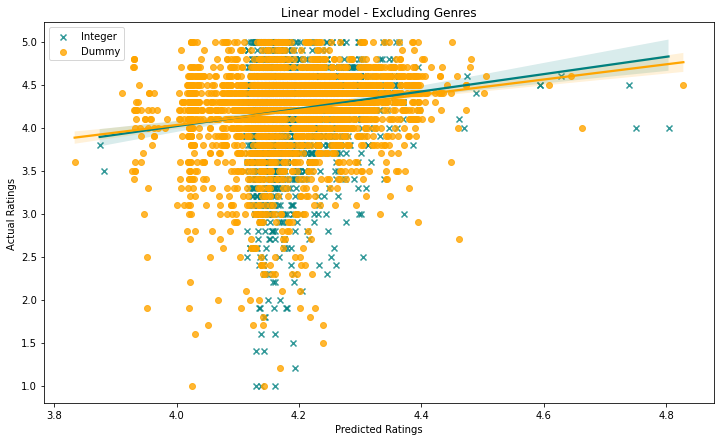

In [60]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [61]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Actual mean of population:4.191837606837606
Integer encoding(mean) :4.186997606497467
Dummy encoding(mean) :4.189378802402409
Integer encoding(std) :0.05859969266068017
Dummy encoding(std) :0.09984740396766785


На первый взгляд трудно понять, какая модель (фиктивная или горячая) лучше с точки зрения точности прогнозирования. Однако поразительно то, что на первый взгляд кажется, что фиктивная модель благоприятствует результату с более низким рейтингом по сравнению с целочисленной моделью.

Хотя, если мы посмотрим на фактическое среднее значение результатов прогнозирования, оба они примерно одинаковы, **однако результаты с фиктивным кодированием имеют гораздо большее стандартное отклонение по сравнению с моделью с целочисленным кодированием.**

Далее рассматривается линейная модель, включающая метку жанра в виде числового значения.

In [62]:
#Including genre label

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results, name = 'Linear(inc Genre) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear(inc Genre) - Dummy'),ignore_index = True)

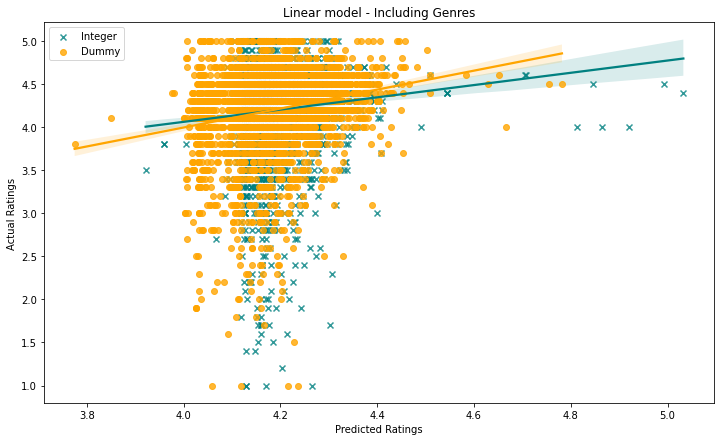

In [63]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [64]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Integer encoding(mean) :4.191383699766099
Dummy encoding(mean) :4.186390775181257
Integer encoding(std) :0.06952386686932045
Dummy encoding(std) :0.09589231572782107


При включении данных жанра мы видим небольшую разницу в среднем между линейными моделями с целочисленным и фиктивным кодированием. std модели с фиктивным кодированием все еще выше, чем у модели с целочисленным кодированием.

Что меня лично поражает, так это то, что линия регрессии с фиктивным кодированием на диаграмме рассеяния теперь более плоская, чем линия регрессии с целочисленным кодированием, что может указывать на «худший» результат, учитывая, что обычно вы хотите, чтобы значение бета вашей регрессии было ближе к 1, чем до 0.

**Next up is the SVR model.**

In [65]:
#Excluding genres
from sklearn import svm
#Integer encoding

X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#dummy based


X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

Results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)

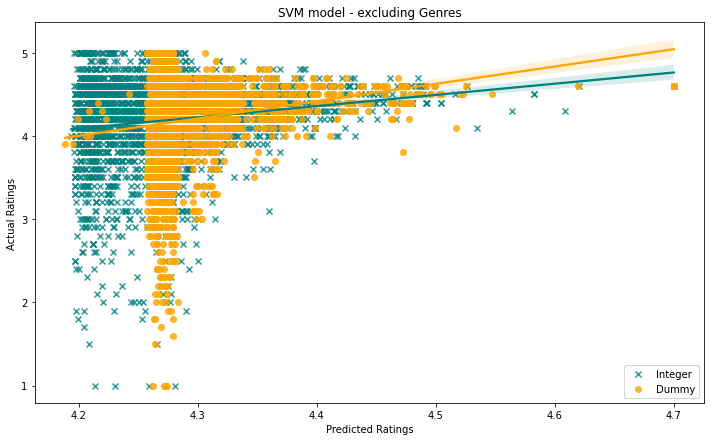

In [66]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [67]:
print ('Integer encoding(mean) :' + str(Results2.mean()))
print ('Dummy encoding(mean) :'+ str(Results2_d.mean()))
print ('Integer encoding(std) :' + str(Results2.std()))
print ('Dummy encoding(std) :'+ str(Results2_d.std()))

Integer encoding(mean) :4.274927625193231
Dummy encoding(mean) :4.292563128586137
Integer encoding(std) :0.062463753736323395
Dummy encoding(std) :0.04240668043374433


Результаты довольно интересные. В целом модель предсказывала, что довольно много оценок будет примерно на уровне 4,2, хотя фактические оценки не были такими. Глядя на диаграмму рассеяния, кажется, что модель с целочисленным кодированием работает лучше в этом случае.

Как обычно, модель с фиктивным кодированием имеет более высокое стандартное значение, чем модель с целочисленным кодированием.

In [68]:
#Integer encoding, including Genres_c
model2a = svm.SVR()

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2a.fit(X_train,y_train)

Results2a = model2a.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a, name = 'SVM(inc Genres) - Integer'),ignore_index = True)

#dummy encoding, including Genres_c
model2a = svm.SVR()

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2a.fit(X_train_d,y_train_d)

Results2a_d = model2a.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2a_d, name = 'SVM(inc Genres) - Dummy'),ignore_index = True)

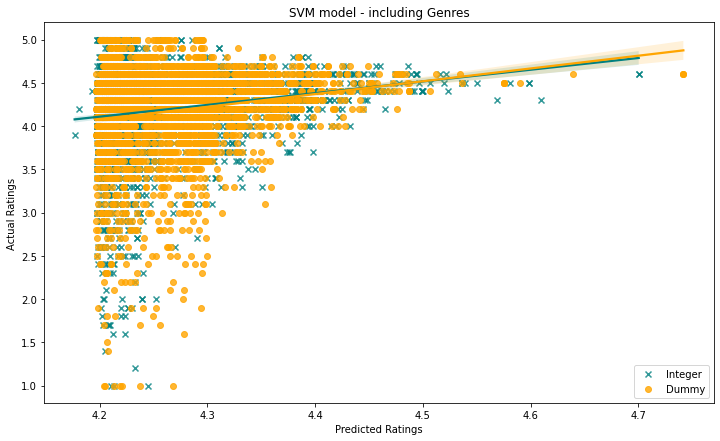

In [69]:
plt.figure(figsize=(12,7))
sns.regplot(Results2a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [70]:
print ('Integer encoding(mean) :' + str(Results2a.mean()))
print ('Dummy encoding(mean) :'+ str(Results2a_d.mean()))
print ('Integer encoding(std) :' + str(Results2a.std()))
print ('Dummy encoding(std) :'+ str(Results2a_d.std()))

Integer encoding(mean) :4.261788092935428
Dummy encoding(mean) :4.272523914894042
Integer encoding(std) :0.06669556338183709
Dummy encoding(std) :0.061703857630529116


С включением переменной жанра dummy encoding model теперь работает лучше, поскольку мы видим, что линия регрессии, сравнивающая фактические и прогнозируемые результаты, очень похожа на модель целочисленного кодирования.

Кроме того, стандартное значение dummy encoding model значительно снизилось и теперь имеет более высокое среднее значение по сравнению с моделью с целочисленным кодированием.

**Далее идет модель регрессора случайного леса.**
Честно говоря, это моя любимая модель, поскольку она не только быстрая, но и позволяет увидеть, какие независимые переменные существенно влияют на результат модели.

In [71]:
from sklearn.ensemble import RandomForestRegressor

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3_d = RandomForestRegressor()
model3_d.fit(X_train_d,y_train_d)
Results3_d = model3_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3_d, name = 'RFR - Dummy'),ignore_index = True)

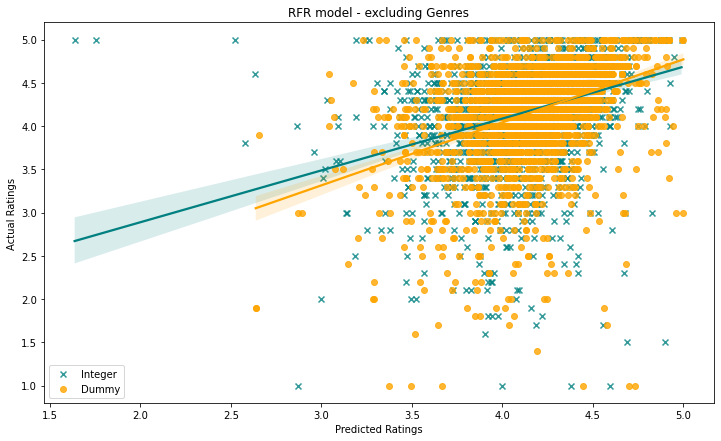

In [72]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [73]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.177477487789988
Dummy encoding(mean) :4.195445791785375
Integer encoding(std) :0.2922981354442637
Dummy encoding(std) :0.288347619056851



На первый взгляд, я бы сказал, что модель RFR дала наилучшие прогностические результаты, просто взглянув на построенный график разброса. В целом обе модели, целочисленная и dummy encoded model, похоже, работают относительно одинаково, хотя dummy encoded model имеет более высокое общее прогнозируемое среднее значение.

<Figure size 1008x720 with 0 Axes>

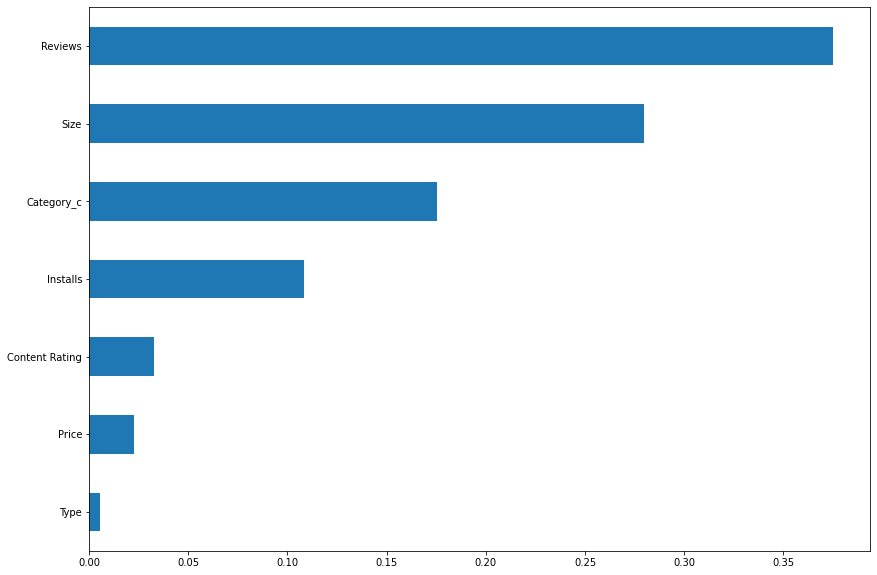

In [74]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,model3.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Если мы посмотрим на то, что влияет на рейтинги, то первые 4 – отзывы, размер, категория и количество установок, по-видимому, будут иметь наибольшее влияние. Это довольно интересное наблюдение, хотя и поддающееся обоснованию.

<Figure size 1008x720 with 0 Axes>

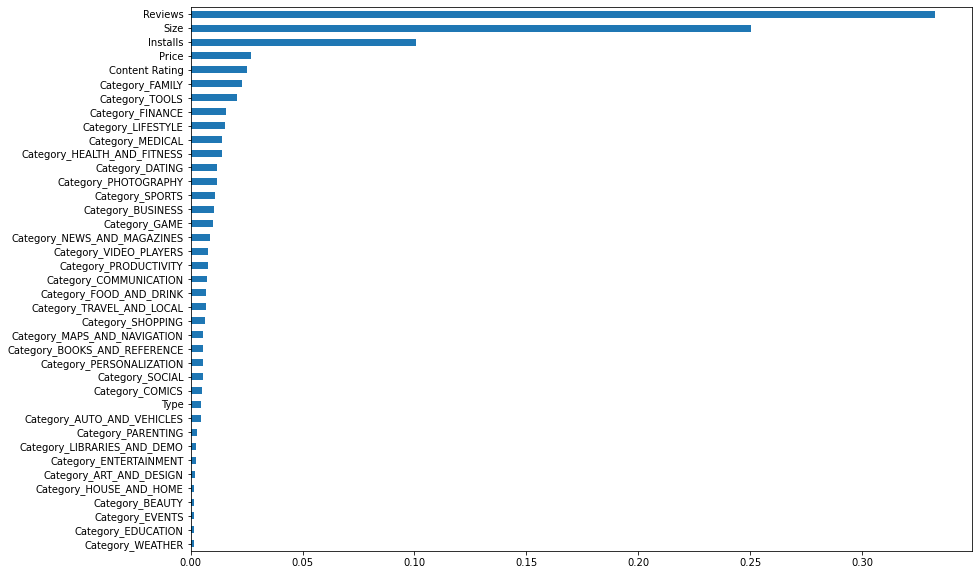

In [75]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Глядя на разбивку еще дальше, может показаться, что действительно отзывы, размер и количество установок остаются важными факторами, влияющими на предсказуемость рейтингов приложений. Что мне интересно, так это то, как категория приложений «Инструменты» имеет такой высокий уровень предсказуемости с точки зрения оценок, скажем, по сравнению с категорией «Еда и напитки».

In [76]:

#Including Genres_C

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model3a = RandomForestRegressor()
model3a.fit(X_train,y_train)
Results3a = model3a.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a, name = 'RFR(inc Genres) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model3a_d = RandomForestRegressor()
model3a_d.fit(X_train_d,y_train_d)
Results3a_d = model3a_d.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a_d, name = 'RFR(inc Genres) - Dummy'),ignore_index = True)

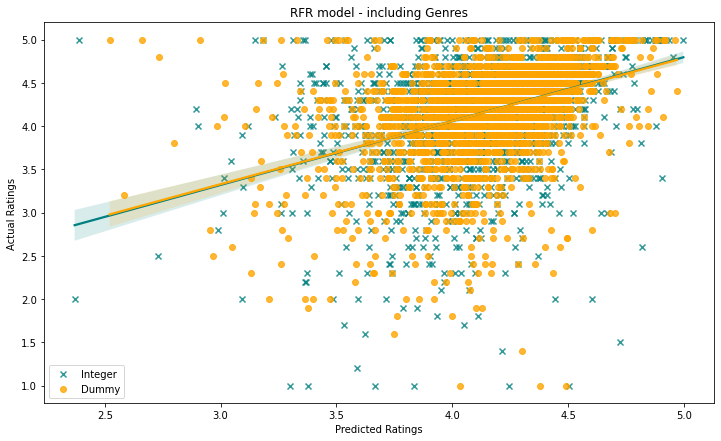

In [77]:
plt.figure(figsize=(12,7))
sns.regplot(Results3a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [78]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.177477487789988
Dummy encoding(mean) :4.195445791785375
Integer encoding(std) :0.2922981354442637
Dummy encoding(std) :0.288347619056851


Опять же, с включением переменной жанра результаты, похоже, не сильно отстают по сравнению с предыдущими результатами.

<Figure size 1008x720 with 0 Axes>

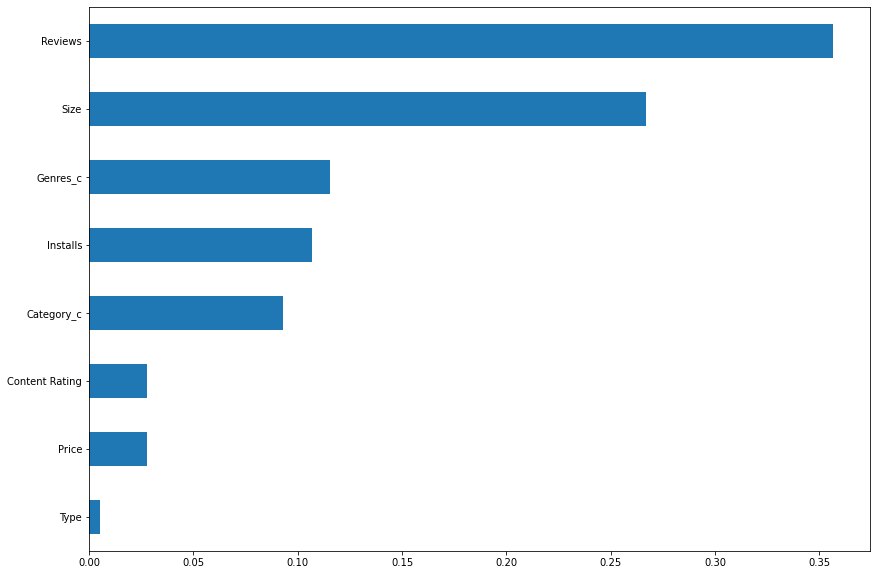

In [79]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,model3a.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Судя по результатам, жанровая секция действительно играет важную роль в формировании дерева решений. Тем не менее, его исключение, по-видимому, не оказывает существенного влияния на результаты. Это мне весьма интересно.

<Figure size 1008x720 with 0 Axes>

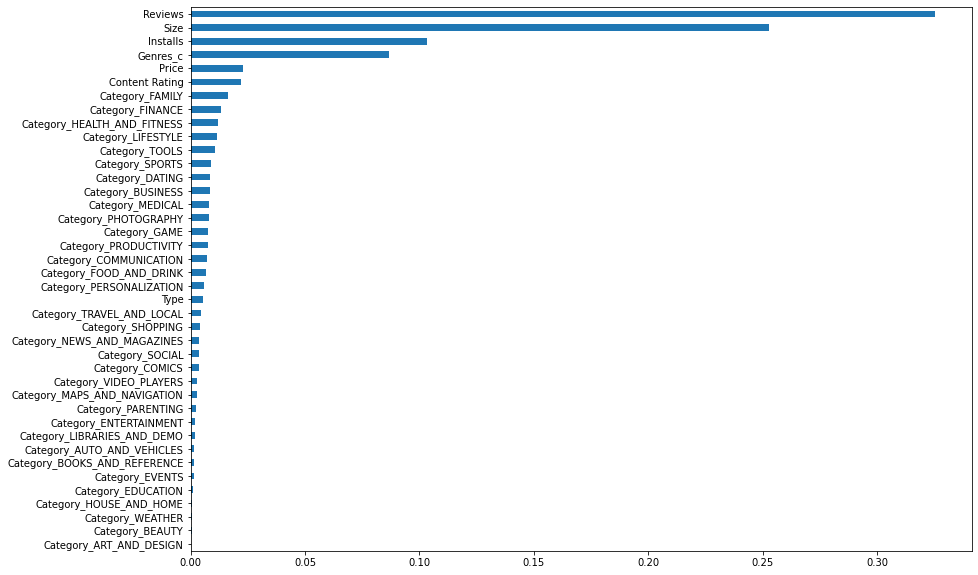

In [80]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,model3a_d.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

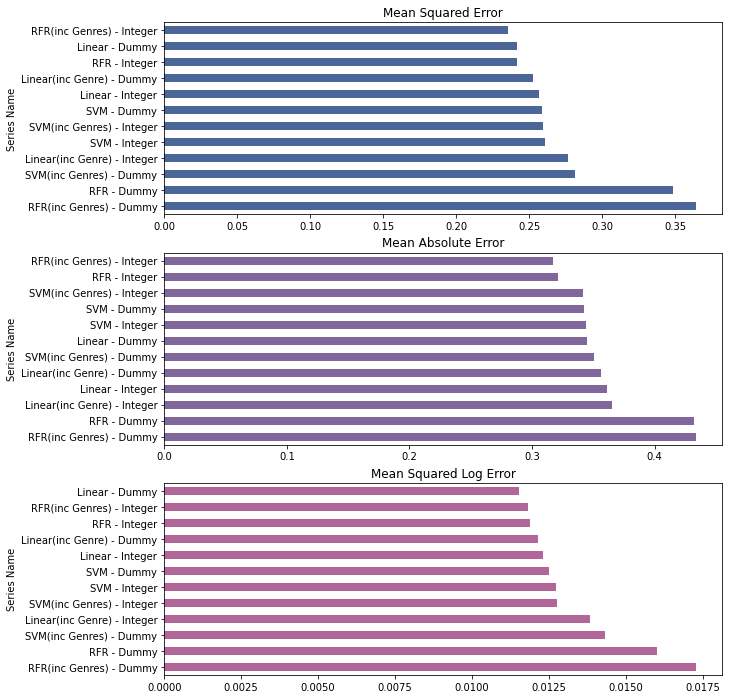

In [81]:
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()


# **Conclusion**

Наконец, глядя на результаты, нелегко сделать вывод, какая модель имеет наилучшую точность прогнозирования и наименьший член ошибки. Используя этот раунд данных в качестве основы, модель SVM с фиктивным кодированием, включая жанры, имеет самую низкую общую частоту ошибок, за которой следует модель RFR с целочисленным кодированием, включая гены. Тем не менее, все модели кажутся очень близкими с точки зрения ошибки, поэтому этот результат, вероятно, изменится.

Что меня очень удивило, так это то, что фиктивная модель RFR имеет такой значительно больший член ошибки по сравнению со всеми другими моделями, хотя на первый взгляд казалось, что она работает очень похоже на целочисленную модель RFR.

Было очень интересно и полезно выполнять этот проект, используя разные модели машинного обучения для непрерывных переменных, чтобы увидеть, хорошо ли они работают в прогнозном анализе на основе предоставленных данных. 

In [82]:
from IPython.display import Image
Image(url='https://media.tenor.com/-ODlnJ5-kQIAAAAM/cat-surprised-cat-what.gif')